# Import the Python API module and Instantiate the GIS object

Import the Python API

In [1]:
import arcgis

Create an GIS object instance using the [account currently logged in through ArcGIS Pro](https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/#ArcGIS-Pro-user-connecting-to-the-active-portal-in-the-Pro-app)

In [44]:
gis_retail = arcgis.gis.GIS('Pro')

# Get a Feature Set, data to work with, from the Web GIS Item ID

Create a [Web GIS Item](http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.gis.toc.html#item) instance using the Item ID

<Item title:"Drive_Time_Trade_Areas" type:Feature Service owner:joel5174@esri.com_commteamretail>
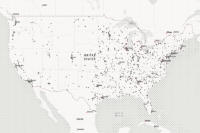

In [47]:
trade_area_itemid = 'bf361f9081fd43a7ba57357e74ccc373'

item = arcgis.gis.Item(gis=gis_retail, itemid=trade_area_itemid)
item

Since the item only contains one feature layer, get the first layer in the item, the [Feature Layer](http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#featurelayer) we need to work with.

In [38]:
feature_layer = item.layers[0]
feature_layer

<FeatureLayer url:"https://services.arcgis.com/PMTtzuTB6WiPuNSv/arcgis/rest/services/Drive_Time_Trade_Areas/FeatureServer/0">

Now, for this initial analysis, [query](http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#arcgis.features.FeatureLayer.query) to return just the attributes for the eight minute trade areas as a [Feature Set](http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#featureset).

In [42]:
feature_set = feature_layer.query(where="AREA_DESC = '0 - 8 minutes'", returnGeometry=False)

# Convert the Data into a Pandas Data Frame

Take advantage of the [`df` function](http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#arcgis.features.FeatureSet.df) on the Feature set object returned from the query to convert the data to a [Pandas Data Frame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [41]:
data_frame = feature_set.df
data_frame.head()

,AGGDI_CY,AGGNW_CY,AMERIND_CY,AREA_DESC,AREA_ID,ASIAN_CY,ASSCDEG_CY,AVGDI_CY,AVGFMSZ_CY,AVGHHSZ_CY,...,VAL1M_CY,VAL200K_CY,VAL250K_CY,VAL300K_CY,VAL400K_CY,VAL500K_CY,VAL50K_CY,VAL750K_CY,WHITE_CY,WIDOWED_CY
OBJECTID,,,,,,,,,,,,,,,,,,,,,
3,551906518,2390086587,594,0 - 8 minutes,897225868_1,1432,1669,51008,4.33,3.96,...,157,487,514,1015,938,1290,186,223,19872,1377
6,6247270524,70627761591,1412,0 - 8 minutes,404768898_1,42842,11671,92202,3.30,2.87,...,4720,472,723,2195,4173,19341,543,11822,113028,7292
9,3033117454,26795808683,1132,0 - 8 minutes,705003717_1,36384,6982,83499,3.65,3.31,...,871,343,653,2295,4218,11458,733,2607,51285,3382
12,2954490789,12560995634,1413,0 - 8 minutes,427515311_1,22184,4944,66758,3.25,2.52,...,1117,227,334,1598,2642,5951,137,2150,58040,3501
15,2048112658,7503591356,1168,0 - 8 minutes,435682132_1,17313,3624,62439,3.42,2.65,...,587,178,314,1410,1888,3907,78,1312,42363,2523


# Save dependent and independent variable names as Python variables

Use a quick list comprehension to create a list of field names to be used as independent variables.

In [45]:
field_name_independent_list = [field['name'] for field in feature_set.fields if 
    field['type'] != 'esriFieldTypeOID' and  # we don't need the Esri object identifier field
    field['name'].startswith('Shape_') == False and  # exclude the Esri shape fields
    field['type'] == 'esriFieldTypeDouble' and  # ensure numeric, quantatative, fields are the only fields used
    field['name'] != 'STORE_LAT' and  # while numeric, the fields describing the location are not independent varaibles
    field['name'] != 'STORE_LONG' and  # while numeric, the fields describing the location are not independent varaibles
    field['name'] != 'SALESVOL'  # exclude the dependent variable
]
print(field_name_independent_list)

['TOTPOP_CY', 'HHPOP_CY', 'FAMPOP_CY', 'GQPOP_CY', 'POPDENS_CY', 'TOTHH_CY', 'AVGHHSZ_CY', 'FAMHH_CY', 'AVGFMSZ_CY', 'TOTHU_CY', 'OWNER_CY', 'RENTER_CY', 'VACANT_CY', 'POPGRW10CY', 'HHGRW10CY', 'FAMGRW10CY', 'NOHS_CY', 'SOMEHS_CY', 'HSGRAD_CY', 'GED_CY', 'SMCOLL_CY', 'ASSCDEG_CY', 'BACHDEG_CY', 'GRADDEG_CY', 'NEVMARR_CY', 'MARRIED_CY', 'WIDOWED_CY', 'DIVORCD_CY', 'WHITE_CY', 'BLACK_CY', 'AMERIND_CY', 'ASIAN_CY', 'PACIFIC_CY', 'OTHRACE_CY', 'RACE2UP_CY', 'HISPPOP_CY', 'HISPWHT_CY', 'HISPBLK_CY', 'HISPAI_CY', 'HISPASN_CY', 'HISPPI_CY', 'HISPOTH_CY', 'HISPMLT_CY', 'NONHISP_CY', 'NHSPWHT_CY', 'NHSPBLK_CY', 'NHSPAI_CY', 'NHSPASN_CY', 'NHSPPI_CY', 'NHSPOTH_CY', 'NHSPMLT_CY', 'MINORITYCY', 'DIVINDX_CY', 'HINC0_CY', 'HINC15_CY', 'HINC25_CY', 'HINC35_CY', 'HINC50_CY', 'HINC75_CY', 'HINC100_CY', 'HINC150_CY', 'HINC200_CY', 'MEDHINC_CY', 'AVGHINC_CY', 'PCI_CY', 'DI0_CY', 'DI15_CY', 'DI25_CY', 'DI35_CY', 'DI50_CY', 'DI75_CY', 'DI100_CY', 'DI150_CY', 'DI200_CY', 'AGGDI_CY', 'MEDDI_CY', 'AVGDI_CY', 

Also, save the name of the dependent variable field as well.

In [37]:
field_name_dependent = 'SALESVOL'

# Now What?

This is where I am now in over my head. Initially, my thought for this first stab is to create four to six store segments using SciKit learn, and identifying the defining attributes of each. This addresses the need of stores to identify store segments for customized assortment planning. Hence, although I do not know exactly how to accomplish this, I can discuss the business case quite easily.